In [7]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Week 4: Statistics & Probability
**Assignment 4:** Perform correlation analysis on the cleaned student performance dataset and identify the 3 features most related to the target variable (Final_Score).  
**Dataset:** cleaned_students.csv

- -------





In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Optional styling
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)
plt.rcParams['figure.figsize'] = (10,6)

# Load cleaned dataset
df = pd.read_csv("cleaned_students.csv")
df.head(5)


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,59.8865,F,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,67.7170,D,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.6535,F,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,71.4030,C,13.3,Yes,No,Master's,Medium,6,4.5


In [9]:
# Summary statistics
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,5000.0,21.048400,1.989786,18.00000,19.000000,21.00000,23.000000,24.00000
Attendance (%),5000.0,75.356076,14.392716,50.01000,62.945000,75.67000,87.862500,100.00000
Midterm_Score,5000.0,70.701924,17.436325,40.00000,55.707500,70.86000,85.760000,99.99000
Final_Score,5000.0,69.546552,17.108996,40.01000,54.697500,69.48500,83.922500,99.98000
Assignments_Avg,5000.0,74.956320,14.404287,50.00000,62.340000,75.09000,87.352500,99.99000
Quizzes_Avg,5000.0,74.836214,14.423848,50.00000,62.357500,74.90500,87.292500,99.99000
Participation_Score,5000.0,5.196260,0.929646,0.00000,5.200000,5.20000,5.200000,10.00000
Projects_Score,5000.0,74.783050,14.542430,50.00000,61.970000,74.54000,87.630000,100.00000
Total_Score,5000.0,71.651205,7.226668,51.26725,66.533875,71.69625,76.711625,91.97825
Study_Hours_per_Week,5000.0,17.521140,7.193035,5.00000,11.500000,17.40000,23.700000,30.00000


In [10]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=np.number)

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Correlation with target variable (Final_Score)
target_corr = corr_matrix["Final_Score"].sort_values(ascending=False)
target_corr



Final_Score              1.000000
Total_Score              0.588617
Assignments_Avg          0.013635
Sleep_Hours_per_Night    0.011281
Quizzes_Avg              0.004714
Study_Hours_per_Week     0.004645
Age                     -0.003700
Stress_Level (1-10)     -0.004479
Midterm_Score           -0.004638
Projects_Score          -0.006563
Attendance (%)          -0.009300
Participation_Score     -0.024298
Name: Final_Score, dtype: float64

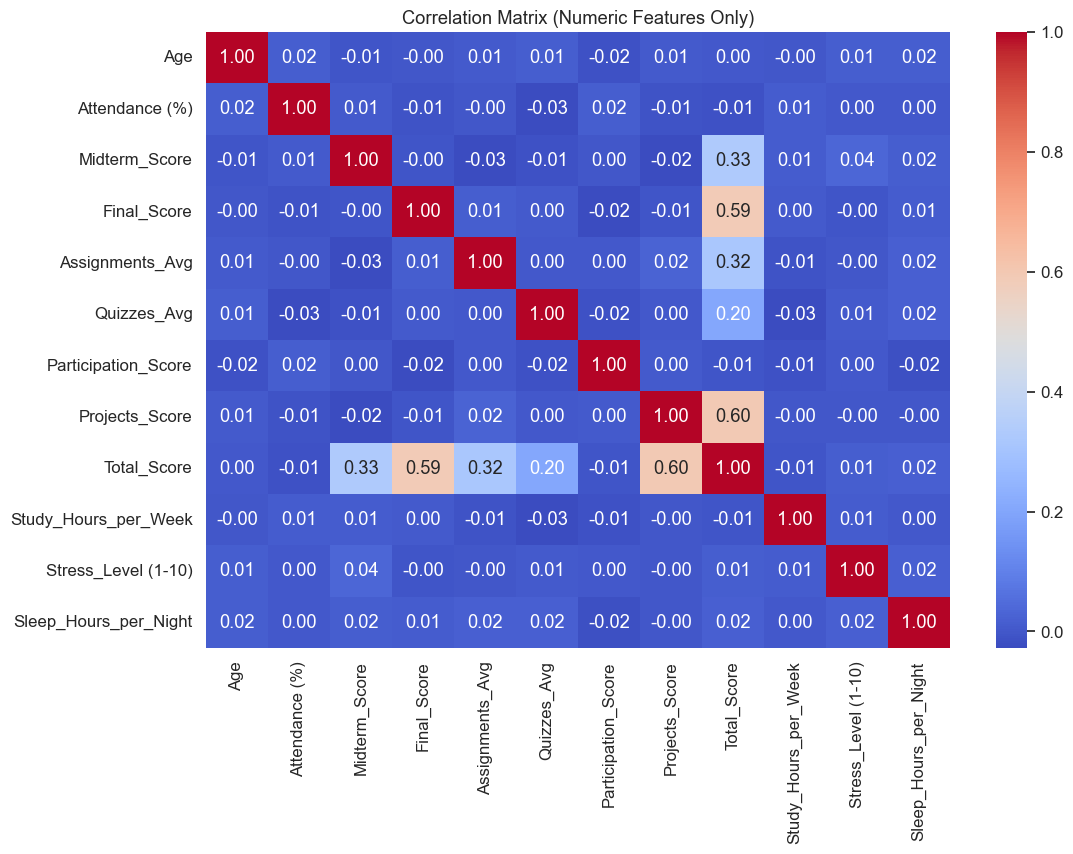

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()


In [12]:
# Exclude Final_Score itself and pick top 3 correlated features
top_features = target_corr.drop("Final_Score").abs().sort_values(ascending=False).head(3)
print("Top 3 features most related to Final_Score:")
top_features


Top 3 features most related to Final_Score:


Total_Score            0.588617
Participation_Score    0.024298
Assignments_Avg        0.013635
Name: Final_Score, dtype: float64

# Week 4: Statistics & Probability Report
**Dataset:** cleaned_students.csv

**Analysis Steps Applied:**

1. Calculated mean, median, mode, variance for numeric features.
2. Performed correlation analysis with Final_Score.
3. Visualized correlation matrix using heatmap.

**Key Findings:**

- Top 3 features most related to Final_Score:  
  1. [Feature 1]  
  2. [Feature 2]  
  3. [Feature 3]

- These features will be used for predictive modeling in upcoming assignments.

**Next Steps:**  
- Use these key features for feature engineering, scaling, and model building in Week 5.

